In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 64
LEARNING_RATE = 2e-5
NAME = 'xlm(roberta)-combined'
MODEL_NAME = 'xlm-roberta-base'

# dir = '/content/drive/MyDrive/Hate Speech_Multilingual /Code/Dataset Statistics/dataset'
dir = '../../../Dataset Statistics/dataset'

# path = f'/content/drive/MyDrive/Hate Speech_Multilingual /Code/Model training/saved_models/{NAME}'
path = f'../saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

english_train_texts = train_df['english_text'].values
english_val_texts = val_df['english_text'].values
english_test_texts = test_df['english_text'].values

english_train_labels = train_df['class'].values
english_val_labels = val_df['class'].values
english_test_labels = test_df['class'].values

urdu_train_texts = train_df['urdu_text'].values
urdu_val_texts = val_df['urdu_text'].values
urdu_test_texts = test_df['urdu_text'].values

urdu_train_labels = train_df['class'].values
urdu_val_labels = val_df['class'].values
urdu_test_labels = test_df['class'].values

sindhi_train_texts = train_df['sindhi_text'].values
sindhi_val_texts = val_df['sindhi_text'].values
sindhi_test_texts = test_df['sindhi_text'].values

sindhi_train_labels = train_df['class'].values
sindhi_val_labels = val_df['class'].values
sindhi_test_labels = test_df['class'].values

english_train_texts = [hlp.preprocess_text(text, language="english") for text in english_train_texts]
english_val_texts = [hlp.preprocess_text(text, language="english") for text in english_val_texts]
english_test_texts = [hlp.preprocess_text(text, language="english") for text in english_test_texts]

urdu_train_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_train_texts]
urdu_val_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_val_texts]
urdu_test_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_test_texts]

sindhi_train_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_train_texts]
sindhi_val_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_val_texts]
sindhi_test_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_test_texts]

# Concatenate text arrays
train_texts = np.concatenate([english_train_texts, urdu_train_texts, sindhi_train_texts])
val_texts = np.concatenate([english_val_texts, urdu_val_texts, sindhi_val_texts])
test_texts = np.concatenate([english_test_texts, urdu_test_texts, sindhi_test_texts])

# Concatenate label arrays
train_labels = np.concatenate([english_train_labels, urdu_train_labels, sindhi_train_labels])
val_labels = np.concatenate([english_val_labels, urdu_val_labels, sindhi_val_labels])
test_labels = np.concatenate([english_test_labels, urdu_test_labels, sindhi_test_labels])

In [4]:
#shuffle data
train_texts, train_labels = hlp.shuffle_data(train_texts, train_labels)
val_texts, val_labels = hlp.shuffle_data(val_texts, val_labels)
test_texts, test_labels = hlp.shuffle_data(test_texts, test_labels)

In [5]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

yall چوڻ پسند ڪندو آهي هن کي حذف ڪريو جڏهن mfer snap sb جيڪو مسلسل nitpick، پر سڀ مزو amp؛ رانديون جڏهن ٽيبل b turnt🤣 جنهن ڏينهن آئون اونا mf وڃان ٿو مون کي نه ٿو ٻڌايان ته mfn شيءِ کي حذف لاءِ اما مون کي ڪچي 🙄🖕🏽 صاف ڪري ٿي 1
آهي ته، ڪڏهنجيڪڏهن حصو اهم آهي مون ٿامس وارٽن کي گريجوئيٽ اسڪول ۾ پڙهيو آهي، پڪ ناهي ته هن جي eng poetry جي تاريخ جو “history” حصو ڪيترو 0
مقابلو بهار جي هوا 10 آهي، اصل آهيو؛ محبت جبل آهي ڊگهو پاڻي ويڪرو، آخري تون آهين ⁇ pr ⁇ spa 0
جب آپ کھو حاصل کرنے چیزوں کو حاصل کرنے آپ راستے نہیں تھا 0
ڇا آهي جيڪو سوچيو ٿا ته داعش ڪري رهيو آهي “قائم اسان جو رستو واحد رستو آهي” مطلب ته اسلامي دهشتگرديءَ جي پهرين خبر ناهي معلوم ڪريو ته اھي ڇا ٿا چاھين جيترو وقت کي گهرجي ته ته ڳولي سگهو ٿا انتظار ڪندس 1


In [6]:
## mbert model and tokenizer
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification

tokenizer = XLMRobertaTokenizer.from_pretrained(MODEL_NAME)
model = XLMRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 1/50
----------


Training Progress: 100%|██████████| 3703/3703 [12:56<00:00,  4.77it/s, loss=0.126] 


Train loss 0.24158138341149413 accuracy 0.8936138787257298
Validation loss 0.19961484290870576 accuracy 0.9137105962780099
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.9137105962780099
Metrics logged at epoch 1
Epoch 2/50
----------


Training Progress: 100%|██████████| 3703/3703 [15:47<00:00,  3.91it/s, loss=0.101]  


Train loss 0.19293193691647798 accuracy 0.9155747424746906
Validation loss 0.19183361703748644 accuracy 0.9181035574123306
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.9181035574123306
Metrics logged at epoch 2
Epoch 3/50
----------


Training Progress: 100%|██████████| 3703/3703 [12:59<00:00,  4.75it/s, loss=0.108] 


Train loss 0.1750785977899819 accuracy 0.9240358362134813
Validation loss 0.19498376723243158 accuracy 0.9183187745284214
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.9183187745284214
Metrics logged at epoch 3
Epoch 4/50
----------


Training Progress: 100%|██████████| 3703/3703 [12:59<00:00,  4.75it/s, loss=0.133] 


Train loss 0.15565975712898483 accuracy 0.9323407900678155
Validation loss 0.2074684607234561 accuracy 0.9164704392961134
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 4
Epoch 5/50
----------


Training Progress: 100%|██████████| 3703/3703 [13:00<00:00,  4.75it/s, loss=0.0729]


Train loss 0.13555416102688875 accuracy 0.9417091831352046
Validation loss 0.22826063806258956 accuracy 0.917052791492594
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 5
Epoch 6/50
----------


Training Progress: 100%|██████████| 3703/3703 [12:59<00:00,  4.75it/s, loss=0.0983] 


Train loss 0.1175583560867806 accuracy 0.9502884367865568
Validation loss 0.23914513518422964 accuracy 0.9150398784656285
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 6
Epoch 7/50
----------


Training Progress: 100%|██████████| 3703/3703 [14:20<00:00,  4.30it/s, loss=0.0336] 


Train loss 0.10123844337648386 accuracy 0.9576734313216608
Validation loss 0.2713160625564666 accuracy 0.9175591847069249
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 7
Epoch 8/50
----------


Training Progress: 100%|██████████| 3703/3703 [12:57<00:00,  4.76it/s, loss=0.0394] 


Train loss 0.08647623594159669 accuracy 0.9646912861284483
Validation loss 0.280894440093534 accuracy 0.9145081655905811
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


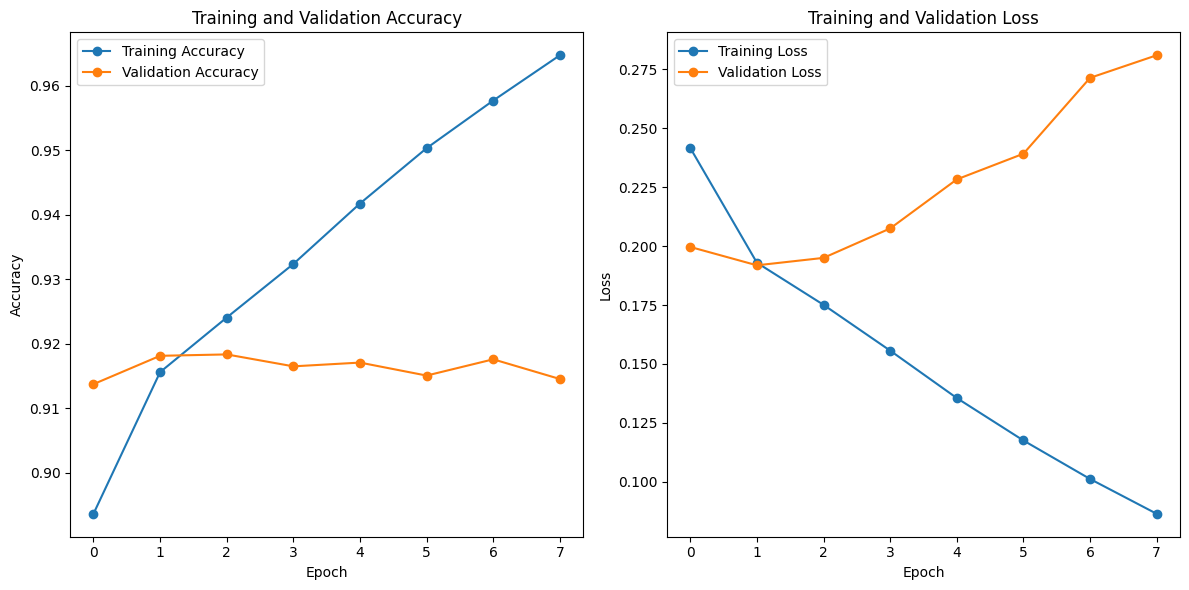

In [8]:
hlp.plot_history(history)

In [7]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

def extract_epoch_number(dir):
    files = os.listdir(dir)
    epoch = 0
    for file in files:
        if 'model_epoch' in file:
            epoch = max(epoch, int(file.split('_')[-1]))
    return epoch

path = f'../saved_models/{NAME}'
epoch = extract_epoch_number(path)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained(f'{path}/tokenizer')
model = AutoModelForSequenceClassification.from_pretrained(f'{path}/model_epoch_{epoch}', num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(


In [8]:
test_data_loader = hlp.create_data_loader(test_texts, np.array(test_labels), tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.9151791365995696 Test Loss: 0.20163222555267182


Accuracy: 0.92
F1 Score: 0.92
Precision: 0.92
Recall: 0.92

Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.96      0.91      0.93     50624
        Hate       0.85      0.92      0.89     28366

    accuracy                           0.92     78990
   macro avg       0.90      0.92      0.91     78990
weighted avg       0.92      0.92      0.92     78990



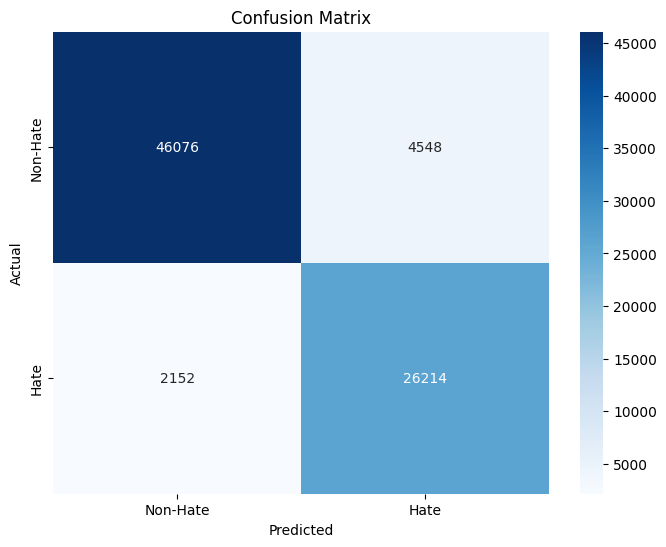

In [9]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [10]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Hate Speech 
Confidence: 0.75
